'고양이'

In [1]:
###################################################
#             동물 분류 프로젝트
#             2021.09.01-이름:
#             ........
#             ..........
###################################################
from tensorflow.keras.models import load_model
from PIL import Image, ImageOps
import numpy as np

In [2]:
# Load the model
model = load_model("C:/Users/user/Downloads/converted_keras/keras_model.h5")

In [3]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_3 (Sequential)    (None, 1280)              410208    
_________________________________________________________________
sequential_5 (Sequential)    (None, 5)                 128600    
Total params: 538,808
Trainable params: 524,728
Non-trainable params: 14,080
_________________________________________________________________


In [4]:
# 캐라스 모델에 데이터를 잘 공급하기 위해서 올바른 shape의 모델을 만든다
# Array에 넣을 수 있는 이미지의 개수는
# 아래의 shape를 보여주는 tuple로 결정된다
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
print(len(data))
data

1


array([[[[1.4531651e+00, 6.8243235e-43, 4.7150254e-32],
         [6.8243235e-43, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00]],

        [[0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         ...,
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
         [0.0000000e+00, 0.0000000e+00, 0.0000000e+00],
  

In [8]:
type(image)

PIL.PngImagePlugin.PngImageFile

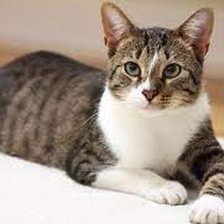

In [7]:
#테스트 할 이미지 경로를 적어준다
image = Image.open('C:/Users/user/Downloads/테스트이미지.png')
image

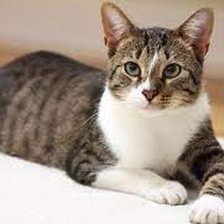

In [9]:
#224x224크기의 이미지로 변환
#resizing the image to be at least 224x224 and then cropping from the center
size = (224, 224)
image = ImageOps.fit(image, size, Image.ANTIALIAS) #ANTIALIAS 이미지 깨짐 최소화
image

In [10]:
#이미지를 numpy array로 변환
image_array = np.asarray(image)
image_array

array([[[187, 169, 148],
        [188, 170, 150],
        [188, 170, 150],
        ...,
        [164, 141, 107],
        [163, 140, 106],
        [162, 139, 105]],

       [[187, 169, 148],
        [188, 170, 150],
        [188, 170, 150],
        ...,
        [165, 142, 107],
        [164, 141, 106],
        [163, 140, 105]],

       [[187, 169, 149],
        [188, 169, 151],
        [188, 169, 151],
        ...,
        [166, 143, 110],
        [165, 142, 109],
        [164, 141, 108]],

       ...,

       [[249, 245, 245],
        [247, 243, 244],
        [247, 243, 244],
        ...,
        [191, 177, 166],
        [190, 177, 167],
        [181, 170, 161]],

       [[249, 245, 245],
        [247, 243, 244],
        [247, 243, 244],
        ...,
        [149, 135, 124],
        [156, 142, 133],
        [157, 146, 137]],

       [[249, 245, 245],
        [247, 243, 244],
        [247, 243, 244],
        ...,
        [113,  99,  88],
        [128, 114, 105],
        [142, 131, 122]]

In [11]:
# 이미지 정규화....(Normalization)
normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
normalized_image_array #224x224x3(RGB) : 정규화된 이미지

array([[[ 0.47244096,  0.33070862,  0.16535437],
        [ 0.48031497,  0.33858263,  0.1811024 ],
        [ 0.48031497,  0.33858263,  0.1811024 ],
        ...,
        [ 0.29133856,  0.11023617, -0.1574803 ],
        [ 0.28346455,  0.10236216, -0.16535431],
        [ 0.27559054,  0.09448814, -0.17322832]],

       [[ 0.47244096,  0.33070862,  0.16535437],
        [ 0.48031497,  0.33858263,  0.1811024 ],
        [ 0.48031497,  0.33858263,  0.1811024 ],
        ...,
        [ 0.29921257,  0.11811018, -0.1574803 ],
        [ 0.29133856,  0.11023617, -0.16535431],
        [ 0.28346455,  0.10236216, -0.17322832]],

       [[ 0.47244096,  0.33070862,  0.17322838],
        [ 0.48031497,  0.33070862,  0.1889764 ],
        [ 0.48031497,  0.33070862,  0.1889764 ],
        ...,
        [ 0.3070866 ,  0.12598431, -0.13385826],
        [ 0.29921257,  0.11811018, -0.14173228],
        [ 0.29133856,  0.11023617, -0.14960629]],

       ...,

       [[ 0.96062994,  0.9291339 ,  0.9291339 ],
        [ 0

In [12]:
# Load the image into the array
data[0] = normalized_image_array #data(1x224x224x3) vs 224x224x3
data[0]

array([[[ 0.47244096,  0.33070862,  0.16535437],
        [ 0.48031497,  0.33858263,  0.1811024 ],
        [ 0.48031497,  0.33858263,  0.1811024 ],
        ...,
        [ 0.29133856,  0.11023617, -0.1574803 ],
        [ 0.28346455,  0.10236216, -0.16535431],
        [ 0.27559054,  0.09448814, -0.17322832]],

       [[ 0.47244096,  0.33070862,  0.16535437],
        [ 0.48031497,  0.33858263,  0.1811024 ],
        [ 0.48031497,  0.33858263,  0.1811024 ],
        ...,
        [ 0.29921257,  0.11811018, -0.1574803 ],
        [ 0.29133856,  0.11023617, -0.16535431],
        [ 0.28346455,  0.10236216, -0.17322832]],

       [[ 0.47244096,  0.33070862,  0.17322838],
        [ 0.48031497,  0.33070862,  0.1889764 ],
        [ 0.48031497,  0.33070862,  0.1889764 ],
        ...,
        [ 0.3070866 ,  0.12598431, -0.13385826],
        [ 0.29921257,  0.11811018, -0.14173228],
        [ 0.29133856,  0.11023617, -0.14960629]],

       ...,

       [[ 0.96062994,  0.9291339 ,  0.9291339 ],
        [ 0

In [13]:
# 예측 실행
prediction = model.predict(data) #model에서 읽을 수 있는 shape(1,224,224,3)
print(prediction)

[[1.8416573e-12 1.0000000e+00 2.9541588e-11 1.5211131e-09 1.6990456e-09]]


In [14]:
np.argmax(prediction) #prediction array에서 가장 값이 큰 데이터의 index

1

In [15]:
labels=['강아지','고양이','곰','토끼','호랑이']
labels[np.argmax(prediction)]

print("주어진 이미지 예상 동물은 {}입니다".format(labels[np.argmax(prediction)]))

주어진 이미지 예상 동물은 고양이입니다


In [16]:
for i in range(len(labels)):
    #print(i,labels[i],prediction[0][i]*100)
    print("{0}\t : {1:.3f}%" .format(labels[i],prediction[0][i]*100))
    

강아지	 : 0.000%
고양이	 : 100.000%
곰	 : 0.000%
토끼	 : 0.000%
호랑이	 : 0.000%


In [17]:
pct=prediction[0][np.argmax(prediction)]*100
print(f"판독 결과 : {pct.round(2)}%의 확률로 {labels[np.argmax(prediction)]}")

판독 결과 : 100.0%의 확률로 고양이


<BarContainer object of 5 artists>

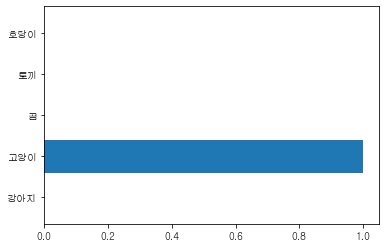

In [18]:
import matplotlib as mpl
#폰트 설정
mpl.rc('font',family='Gulim')
mpl.rc('axes',unicode_minus=False)
#그래프 그리기
import matplotlib.pyplot as plt
plt.barh(labels,prediction[0]) #bar chart(막대그래프)
